# Przestrzeń 2D nieseparowalna

In [76]:
from sklearn.datasets import  make_circles

X, y = make_circles(n_samples=100, noise=0.05)

In [77]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
%matplotlib notebook

plt.scatter(X[:,0],X[:,1],c=y,edgecolors="red" )

<IPython.core.display.Javascript object>

In [78]:
x1, x2 = X[:,0], X[:,1]

In [79]:
z1 = x1 ** 2
z2 = np.sqrt(2)*x1*x2
z3 = x2 ** 2

Z = np.column_stack((z1, z2, z3))

print(Z[:5])

[[ 0.59539376  0.06328905  0.00336374]
 [ 0.56314383  0.08694537  0.00671187]
 [ 0.87757604 -0.10871157  0.00673344]
 [ 0.33825289  0.46008284  0.3128964 ]
 [ 0.13883969 -0.49264956  0.87404256]]


In [80]:
plt.clf()
ax = plt.axes(projection='3d')
ax.scatter3D(z2,z3,z1, c=y, edgecolors="red" )

# Klasyfiklacja win przy użyciu SVM

In [81]:
from sklearn.datasets import load_wine

wines = load_wine()
print(wines['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [82]:
X, y = wines['data'], wines['target']


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

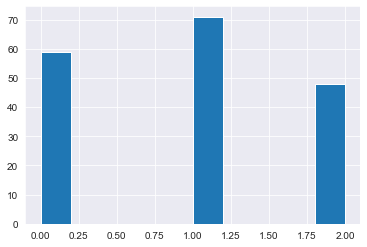

In [83]:
%matplotlib inline

plt.hist(y)

In [108]:
from  sklearn.pipeline import make_pipeline
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

scaler = StandardScaler()

svm = SVC(C=1e-1, kernel='linear', degree=4)

X = scaler.fit(X).transform(X)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

In [110]:
y_pred = svm.fit(X_train, y_train).predict(X_test)

In [111]:
print(f"""{
classification_report(y_pred,y_test)}
Confusion matrix:
{confusion_matrix(y_pred,y_test)}

Number of support vectors per class: {svm.n_support_}
""")

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       0.97      0.97      0.97        39
           2       1.00      0.95      0.98        22

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89

Confusion matrix:
[[28  0  0]
 [ 1 38  0]
 [ 0  1 21]]

Number of support vectors per class: [ 9 13  8]



# Dodanie Pipline do skalowania cech


In [113]:
from sklearn.pipeline import Pipeline

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("SVC", SVC(C=1e-1, kernel='linear', degree=4))
])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [115]:
y_pred = svm.fit(X_train, y_train).predict(X_test)

In [116]:
print(f"""{
classification_report(y_pred,y_test)}
Confusion matrix:
{confusion_matrix(y_pred,y_test)}

Number of support vectors per class: {svm.n_support_}
""")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.94      1.00      0.97        15
           2       1.00      0.95      0.97        19

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Confusion matrix:
[[20  0  0]
 [ 0 15  0]
 [ 0  1 18]]

Number of support vectors per class: [10 18  9]

